<a href="https://colab.research.google.com/github/karman07/all_ml_dl_r/blob/master/Customers_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
customer_data = pd.read_csv('Mall_Customers.csv')

In [3]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
customer_data.shape

(200, 5)

In [6]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


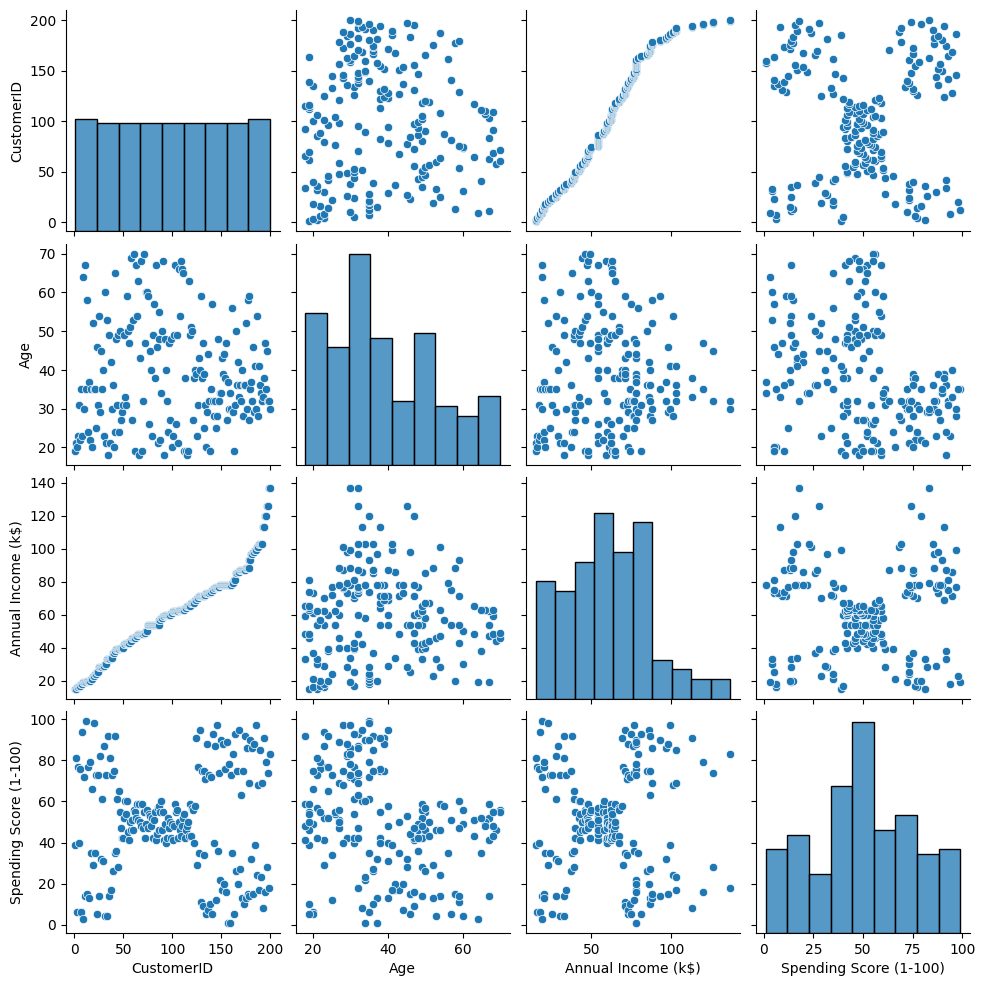

In [7]:
sns.pairplot(customer_data)

In [12]:
customer_data['Gender'] = customer_data['Gender'].map({'Male': 0, 'Female': 1})

<Axes: >

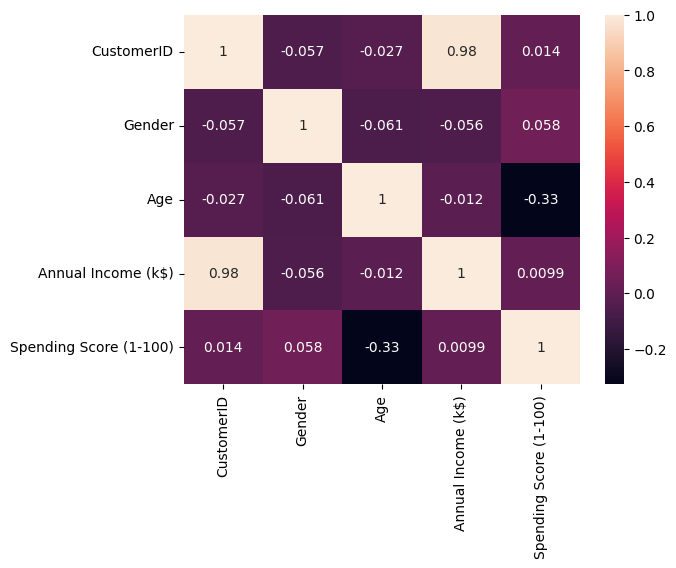

In [13]:
sns.heatmap(customer_data.corr(), annot=True)

In [9]:
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [10]:
customer_data.Gender.value_counts()

,count
Gender,
Female,112
Male,88


In [16]:
df = customer_data

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

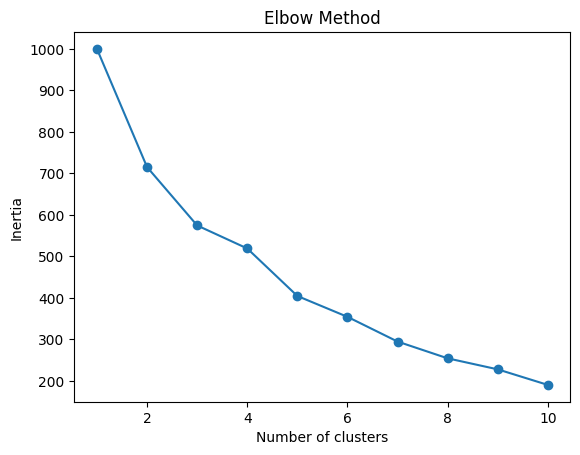

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [19]:
kmeans = KMeans(n_clusters=5)
df['Cluster_KMeans'] = kmeans.fit_predict(df_scaled)

In [20]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=5)
df['Cluster_DBSCAN'] = dbscan.fit_predict(df_scaled)

In [21]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=5)
df['Cluster_Agg'] = agg.fit_predict(df_scaled)

In [22]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5, random_state=42)
df['Cluster_GMM'] = gmm.fit_predict(df_scaled)

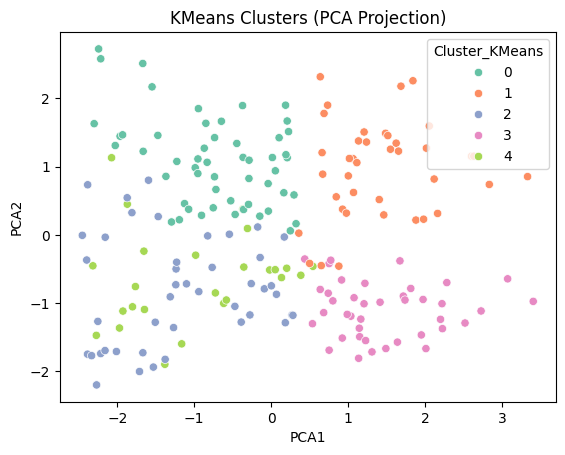

In [23]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
reduced = pca.fit_transform(df_scaled)

df['PCA1'], df['PCA2'] = reduced[:,0], reduced[:,1]

# Example: Visualize KMeans Clusters
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster_KMeans', palette='Set2')
plt.title("KMeans Clusters (PCA Projection)")
plt.show()

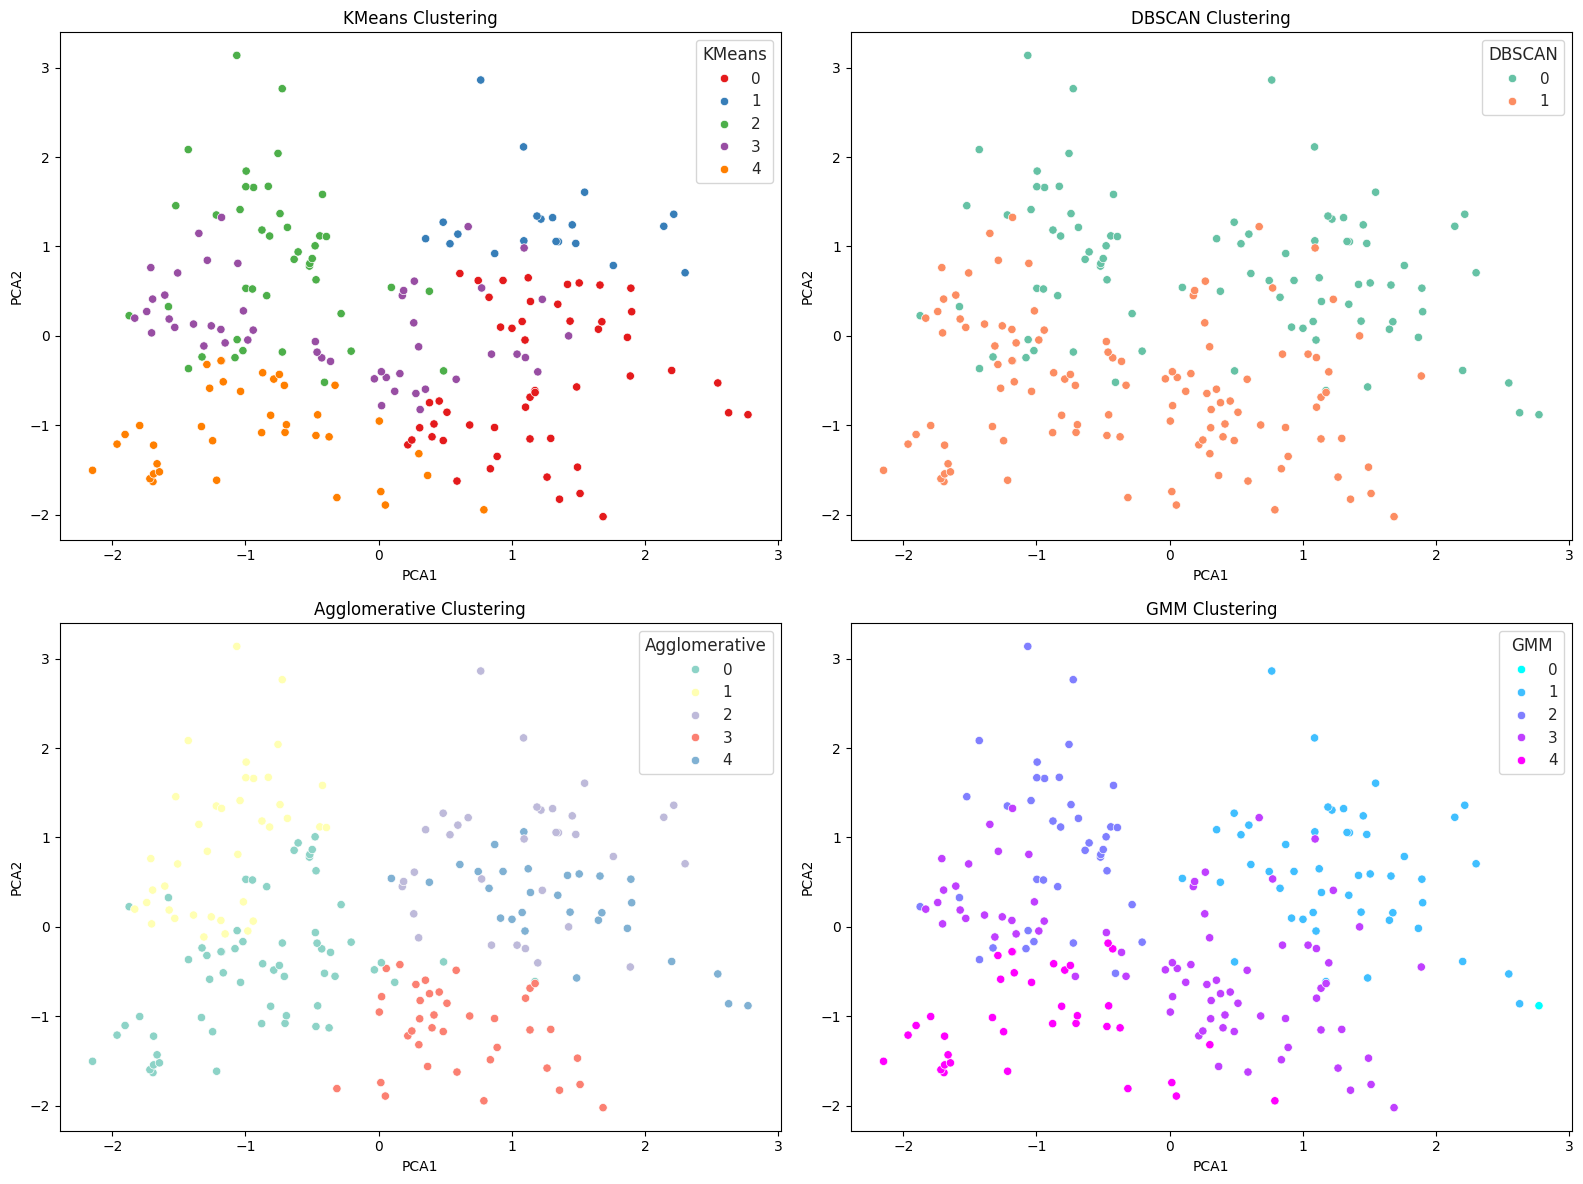

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# Load and preprocess
df = pd.read_csv("Mall_Customers.csv")
df = df.drop("CustomerID", axis=1)
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})

# Standardize
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
df['PCA1'], df['PCA2'] = pca_result[:, 0], pca_result[:, 1]

# Clustering Models
df['KMeans'] = KMeans(n_clusters=5, random_state=42).fit_predict(df_scaled)
df['DBSCAN'] = DBSCAN(eps=1.5, min_samples=5).fit_predict(df_scaled)
df['Agglomerative'] = AgglomerativeClustering(n_clusters=5).fit_predict(df_scaled)
df['GMM'] = GaussianMixture(n_components=5, random_state=42).fit_predict(df_scaled)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.set(style='whitegrid')

sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='KMeans', palette='Set1', ax=axes[0, 0]).set_title('KMeans Clustering')
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='DBSCAN', palette='Set2', ax=axes[0, 1]).set_title('DBSCAN Clustering')
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Agglomerative', palette='Set3', ax=axes[1, 0]).set_title('Agglomerative Clustering')
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='GMM', palette='cool', ax=axes[1, 1]).set_title('GMM Clustering')

plt.tight_layout()
plt.show()
